<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/Xception_TF_Pneumonia_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
# use the link for TPU troubleshooting https://cloud.google.com/tpu/docs/troubleshooting

Device: grpc://10.10.248.162:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.10.248.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.10.248.162:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8


In [3]:
print(tf.__version__)

2.2.0


In [4]:
#drive.flush_and_unmount()

In [5]:
# !fusermount -u drive
# !google-drive-ocamlfuse drive

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#check present working directory
cwd = !pwd
print("Current folder: ",cwd)
# %cd '/content/drive/My Drive/AIML/AI/rsnadata/'  #changing as mount subfolder causing issue AIML/AI/rsnadata/
%cd '/content/drive/My Drive'
cwd = !pwd
print("Current working directory after seting proj folder: ",cwd)

Current folder:  ['/content']
/content/drive/My Drive
Current working directory after seting proj folder:  ['/content/drive/My Drive']


In [ ]:
!ls -ltr

In [7]:
from google.colab import auth
auth.authenticate_user()
project_id = 'thirumlai'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://thirumlai/


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
GCS_PATH = 'gs://thirumlai'       #cwd[0] #/content/drive/My Drive
IMAGE_SIZE = [224, 224]
EPOCHS = 25

In [9]:
filenames = tf.io.gfile.glob(str(GCS_PATH + '/positive/*'))
filenames.extend(tf.io.gfile.glob(str(GCS_PATH +'/normal/*')))

train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

In [10]:
len(filenames)

26151

In [11]:
print('trainset size {} and validation test size {}'.format(len(train_filenames),len(val_filenames)))

trainset size 20920 and validation test size 5231


In [12]:
COUNT_NORMAL = len([filename for filename in train_filenames if "normal" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "positive" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))
# Normal images count in training set: 16205
# Pneumonia images count in training set: 4716

Normal images count in training set: 16201
Pneumonia images count in training set: 4719


In [13]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

for f in train_list_ds.take(5):
    print(f.numpy())

b'gs://thirumlai/normal/7ff0e498-ab0c-40fb-8b1b-b6cbaf800a8d.png'
b'gs://thirumlai/positive/bc88fe07-10a9-4032-9a0b-21f57f10d555.jpg'
b'gs://thirumlai/positive/c1ffc793-0e31-4396-a0fc-6f7f6cccb28b.jpg'
b'gs://thirumlai/normal/672abaad-b326-4d12-ad2d-4d61790e6ac2.png'
b'gs://thirumlai/normal/5ef06067-7884-4079-80ef-24cfe392e939.png'


In [14]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 20920
Validating images count: 5231


In [15]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == "positive"

In [16]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, IMAGE_SIZE)

In [17]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [18]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [19]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  False


In [20]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [21]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

image_batch, label_batch = next(iter(train_ds))

In [22]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(16):
        ax = plt.subplot(4,4,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

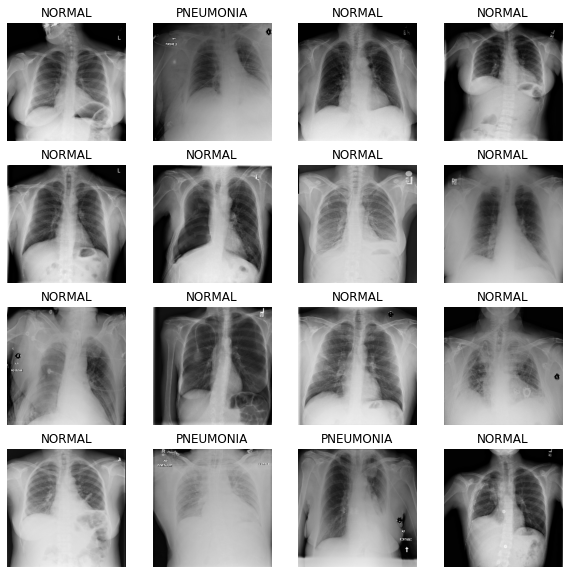

In [23]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [47]:
from tensorflow.keras.applications import Xception
no_classes = 1
def build_model():
  'Returns a Xception architecture NN'
  xception_model= Xception(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), weights='imagenet', include_top=False)
  # add classification top layer
  model = tf.keras.Sequential()
  model.add(xception_model)
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  return model

In [48]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.65
Weight for class 1: 2.22


In [33]:
myadam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [51]:
with strategy.scope():
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer=myadam,
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [52]:
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_ds,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/25
163/163 [==============================] - 715s 4s/step - recall: 0.4004 - loss: 0.8125 - accuracy: 0.5449 - precision: 0.2198 - val_recall: 0.0000e+00 - val_loss: 0.6929 - val_accuracy: 0.7764 - val_precision: 0.0000e+00
Epoch 2/25
163/163 [==============================] - 23s 140ms/step - recall: 0.4656 - loss: 0.6938 - accuracy: 0.5107 - precision: 0.2223 - val_recall: 1.0000 - val_loss: 0.6943 - val_accuracy: 0.2254 - val_precision: 0.2254
Epoch 3/25
163/163 [==============================] - 22s 137ms/step - recall: 0.5868 - loss: 0.6928 - accuracy: 0.4513 - precision: 0.2249 - val_recall: 1.0000 - val_loss: 0.6938 - val_accuracy: 0.2238 - val_precision: 0.2238
Epoch 4/25
163/163 [==============================] - 22s 135ms/step - recall: 0.5960 - loss: 0.6930 - accuracy: 0.4486 - precision: 0.2259 - val_recall: 1.0000 - val_loss: 0.6935 - val_accuracy: 0.2258 - val_precision: 0.2258
Epoch 5/25
163/163 [==============================] - 22s 136ms/step - recall: 0.4736 

In [58]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("thirumlai_pneumonia_xception_weights.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,monitor='loss',restore_best_weights=True)

In [59]:
import math

In [60]:
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.1
   lrate = initial_lrate * math.exp(-k*epoch)
   return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exp_decay)

In [61]:
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=100,
    validation_data=val_ds,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/100
163/163 [==============================] - 33s 201ms/step - recall: 0.4540 - loss: 0.6946 - accuracy: 0.5314 - precision: 0.2286 - val_recall: 1.0000 - val_loss: 0.6948 - val_accuracy: 0.2238 - val_precision: 0.2238 - lr: 0.1000
Epoch 2/100
163/163 [==============================] - 24s 144ms/step - recall: 0.5196 - loss: 0.6945 - accuracy: 0.4935 - precision: 0.2273 - val_recall: 1.0000 - val_loss: 0.7253 - val_accuracy: 0.2242 - val_precision: 0.2242 - lr: 0.0905
Epoch 3/100
163/163 [==============================] - 24s 147ms/step - recall: 0.5043 - loss: 0.6943 - accuracy: 0.4988 - precision: 0.2258 - val_recall: 1.0000 - val_loss: 0.7029 - val_accuracy: 0.2246 - val_precision: 0.2246 - lr: 0.0819
Epoch 4/100
163/163 [==============================] - 22s 136ms/step - recall: 0.5136 - loss: 0.6946 - accuracy: 0.4908 - precision: 0.2252 - val_recall: 1.0000 - val_loss: 0.7159 - val_accuracy: 0.2246 - val_precision: 0.2246 - lr: 0.0741
Epoch 5/100
163/163 [===============

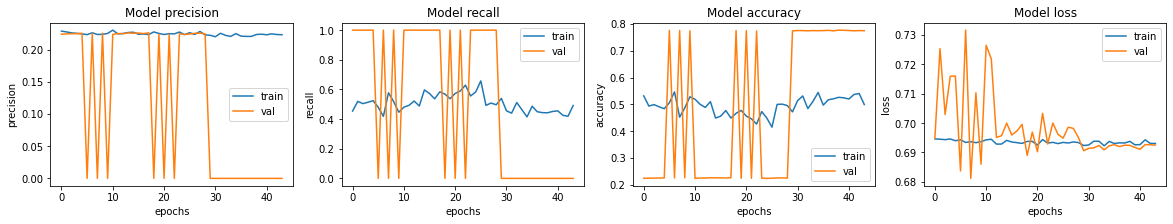

In [62]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])